In [2]:
python read_arduino_v4.py

SyntaxError: invalid syntax (<ipython-input-2-366c9d69deb9>, line 1)

======= Lista de dispositivos USB =======
0  -  /dev/ttyUSB0
Escolha a porta do Arduino (e.g. 0): 0
Comunicação Serial Estabelecida.

Digite o comando.(0,1,2 ou 3)



Intervalos de leitura: 

0 ----> +- 250 deg/s e +- 2g

1 ----> +- 500 deg/s e +- 4g

2 ----> +- 1000 deg/s e +- 8g

3 ----> +- 2000 deg/s e +- 16g

Escolha o intervalo de leitura (e.g. 0): 0
Pressione 'Enter' para iniciar a leitura e "Ctrl+C" para pausar: 

Erro de valor.
Voce pressionou Ctrl+C para interromper este programa! Seus dados foram salvos em 'Dados_2018-07-16 21:15:24.csv'


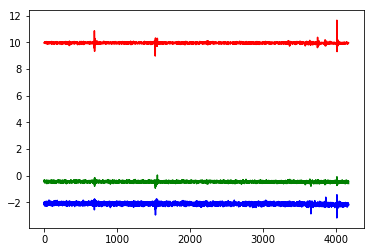

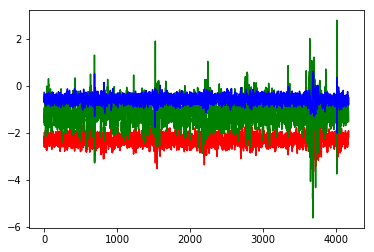

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 29 09:31:48 2018

@author: eduardo-ssr
"""

import sys
import serial
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from drawnow import drawnow
from time import sleep
from datetime import datetime

read1 = []
read2 = []
read3 = []
read4 = []
read5 = []
read6 = []
read7 = []

acelX = []
acelY = []
acelZ = []
gyroX = []
gyroY = []
gyroZ = []

constant_Calib_Acel = (16384/9.81)
constant_Calib_Gyro = 131

t=0

os.system('clear')
print ("======= Lista de dispositivos USB =======")
serial_ports = glob.glob('/dev/ttyUSB*')
while(len(serial_ports)==0):
    print ("Conecte o Arduino...\n")
    sleep(5);
    serial_ports = glob.glob('/dev/ttyUSB*')
        
for i in range(len(serial_ports)): 
    print (i, " - ", serial_ports[i])
    port = input("Escolha a porta do Arduino (e.g. 0): ")
        
ser = serial.Serial(serial_ports[int(port)], 115200,timeout=1)

def main():
    global contador
    global t
    global constant_Calib_Acel
    global constant_Calib_Gyro
    #ser.open()
    if ser.is_open:
        print("Comunicação Serial Estabelecida.\n")
    else :
        print("Erro na Comunicação Serial.\n")
        
    while(t==0):    
        sleep(3)
        print(ser.readline().decode("utf-8"))
        print("\n")
        print("Intervalos de leitura: \n")
        print("0 ----> +- 250 deg/s e +- 2g\n")
        print("1 ----> +- 500 deg/s e +- 4g\n")
        print("2 ----> +- 1000 deg/s e +- 8g\n")
        print("3 ----> +- 2000 deg/s e +- 16g\n")
        #print("Escolha o intervalo de leitura (e.g. 0): ")
        command = (input("Escolha o intervalo de leitura (e.g. 0): "))
        
        sleep(1.8)
        
        if command == '0':
            ser.write(b'0')
            constant_Calib_Acel = (16384/9.81)
            constant_Calib_Gyro = 131
            t = 1
        elif command =='1':
            ser.write(b'1')
            constant_Calib_Acel = (8192/9.81)
            constant_Calib_Gyro = 65.5
            #sleep(2)
            t = 1
        elif command == ('2'):
            ser.write(b'2')
            constant_Calib_Acel = (4096/9.81)
            constant_Calib_Gyro = 32.8
            #sleep(2)
            t = 1
        elif command == ("3") :
            ser.write(b'3')
            constant_Calib_Acel = (2048/9.81)
            constant_Calib_Gyro = 16.4

            t = 1
        else:
            print("Comando inválido, tente outro.\n")
            t = 0
    
   # ax.clear()
   # print(ser.readline().decode("utf-8"))
    input("Pressione 'Enter' para iniciar a leitura e \"Ctrl+C\" para pausar: \n")
    
    
    
    while(True):    
        try:
            line = ser.readline().decode("utf-8")
            #sleep(0.00001)
            #print(line)
            try:
                entry = line.split("\t")
                AcX = np.float(entry[0])
                AcY = np.float(entry[1])
                AcZ = np.float(entry[2])
                temp = np.float(entry[3])
                Gx = np.float(entry[4])
                Gy = np.float(entry[5])
                Gz = np.float(entry[6])
                
                #print(AcX, AcY, AcZ, temp, Gx, Gy, Gz)
                
                ACX = AcX/constant_Calib_Acel  # entre--20 m/s² e + 20 m/s² 
                ACY = AcY/constant_Calib_Acel  # entre--20 m/s² e + 20 m/s² 
                ACZ = AcZ/constant_Calib_Acel  # entre--20 m/s² e + 20 m/s² 
                
                GX = Gx/constant_Calib_Gyro # entre +250º/s e -250º/s
                GY = Gy/constant_Calib_Gyro # entre +250º/s e -250º/s
                GZ = Gz/constant_Calib_Gyro # entre +250º/s e -250º/s
                
                read1.append(AcX) 
                read2.append(AcY)
                read3.append(AcZ)
                read4.append(Gx)
                read5.append(Gy)
                read6.append(Gz)
                read7.append(temp)
                
                acelX.append(ACX)
                acelY.append(ACY)
                acelZ.append(ACZ)
                gyroX.append(GX)
                gyroY.append(GY)
                gyroZ.append(GZ)
                
               # print(ACX,ACY,ACZ,GX,GY,GZ)
                
                
            except (ValueError):
                print("Erro de valor.")
                pass
        
        except (KeyboardInterrupt):
            now = datetime.now()
            print ("Voce pressionou Ctrl+C para interromper este programa! Seus dados foram salvos em 'Dados_%s.csv'"%(str(now)[:-7]))

            ser.close()
            #plt.plot(acelX, '-r')
            
            plt.plot(acelX, "-r")
            plt.plot(acelY, "-g")
            plt.plot(acelZ, "-b")
            plt.show()
           
            
            plt.plot(gyroX, "-r")
            plt.plot(gyroY, "-g")
            plt.plot(gyroZ, "-b")
            plt.show()
            # x = np.vstack((read1,read2,read3,read4,read5,read6,read7))
           # np.savetxt('Dados_%s.csv'%(str(now)[:-7]), np.transpose(x), delimiter=';')  
            break
if __name__ == "__main__":
    main()